### import library

In [1]:
import os
import extractor as ex
import annotator as an
import ocr
import matplotlib.pyplot as plt

    1. Extract pdf file to get checkcode, qrcode and whole paper for grading by extractor

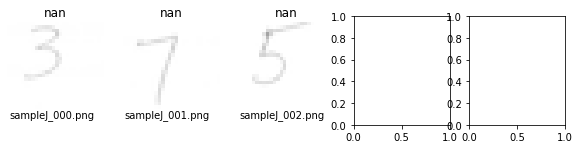

In [2]:
ex.extract(path='pdfs/sampleJ.pdf', 
           key_path='keys/key_sampleJ.csv', 
           get_key=True, 
           qr_box_size=170, 
           box='auto', ### 'auto' or (left, top, right, bottom)
          )
raw = ex.raw_data('sampleJ')
fig = raw.examine()

    2. Use OCR system to classify the digits in checkcode

In [3]:
ocr.predict(mdl_path='OCR_mdl.h5', 
           data_path='sampleJ')

    3. Auto-grading on papers by annotator

In [4]:
raw_paper = an.raw_paper('sampleJ')
raw_paper.annotate()